# Solutions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from collections import Counter
from pylab import rcParams
import re
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_excel('Star_Wars_characters.xlsx')
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,NaN,NaN,no hair,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,none,NaN,NaN,NaN,female,NaN,NaN


In [3]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  87 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      87 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(2), object(8)
memory usage: 6.9+ KB


## Task_1 Plotting the Star Wars Characters by gender

### - with matplotlib

gender
male             62
female           19
no gender         3
none              2
hermaphrodite     1
Name: count, dtype: int64

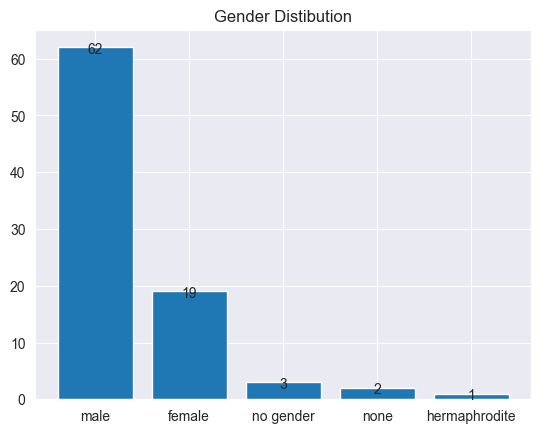

In [32]:
x = df.gender.value_counts()
display(x)

fig, ax = plt.subplots()
ax.bar(data=df, x=x.index, height=x.values)
ax.set_title('Gender Distibution')

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.4, patch.get_height()-1), ha='center')

### - with pandas

In [46]:
print(f'width of each bar: {ax.patches[0].get_width()}')

width of each bar: 0.5


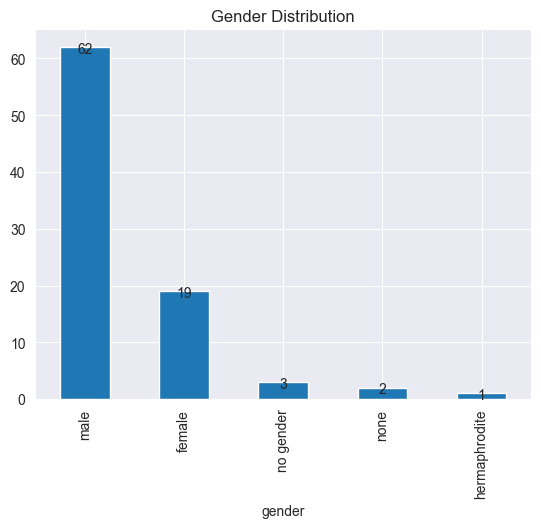

In [45]:
fig, ax = plt.subplots()
ax = df.gender.value_counts().plot(kind='bar', xlabel='gender', title='Gender Distribution');

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.25, patch.get_height()-1), ha='center')

## Task_2 Plotting the Characters by eye color

In [47]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [48]:
df.eye_color.value_counts()

eye_color
brown            21
blue             19
yellow           11
black            10
orange            8
red               5
hazel             3
blue-gray         1
pink              1
red, blue         1
gold              1
green, yellow     1
white             1
dark              1
Name: count, dtype: int64

### - with matplotlib

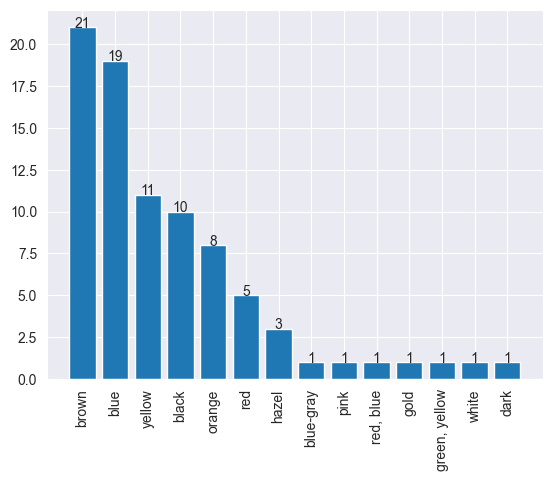

In [59]:
fig, ax = plt.subplots()
ax.bar(data=df, x=df.eye_color.value_counts().index, height=df.eye_color.value_counts().values)
plt.xticks(rotation=90);

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.4, patch.get_height()), ha='center')

### - with pandas

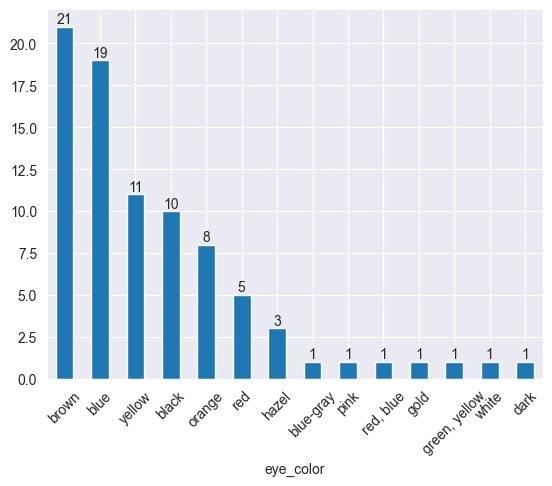

In [67]:
fig, ax = plt.subplots()
ax = df.eye_color.value_counts().plot(kind='bar', xlabel='eye_color')
plt.xticks(rotation=45);

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.25, patch.get_height()+0.2), ha='center')

## Task_3 - Plotting the MASS unde 3 groups: "High_mass", "Normal_mass", "Low_mass"

In [72]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human


In [79]:
def mass_category(x):
    if x >= 100:
        return 'High_mass'
    elif (x > 50) and (x < 100):
        return 'Normal_mass'
    elif x <= 50:
        return 'Low_mass'

df['mass_category'] = df.mass.apply(mass_category)

In [80]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,Normal_mass
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid,Low_mass
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,High_mass
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,Low_mass


In [83]:
df.mass_category.value_counts(dropna=False)

mass_category
Normal_mass    36
None           28
Low_mass       13
High_mass      10
Name: count, dtype: int64

### - with matplotlib

In [84]:
x = df.mass_category.value_counts()

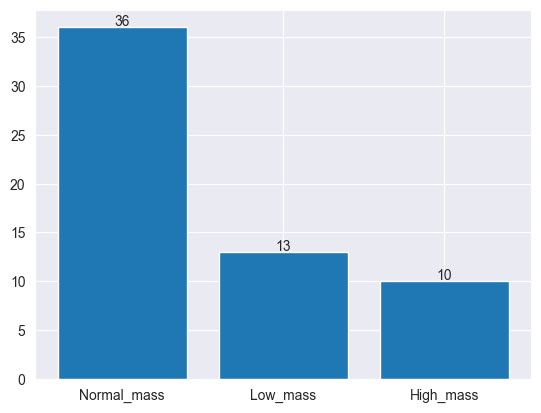

In [89]:
fig, ax = plt.subplots()
ax.bar(data=df, x=x.index, height=x.values)

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.4, patch.get_height()+0.2), ha='center')

### - with pandas

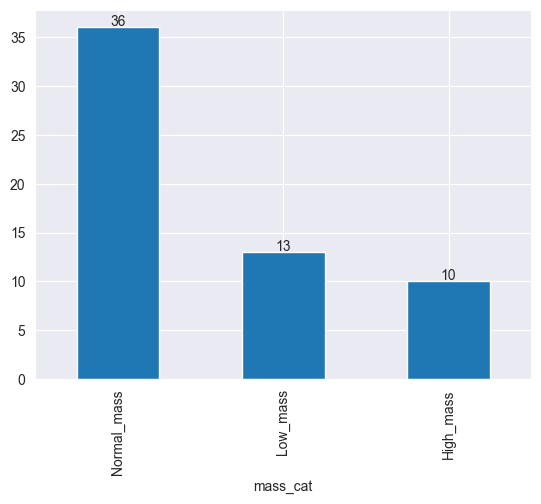

In [94]:
fig, ax = plt.subplots()
ax = df.mass_category.value_counts().plot(kind='bar', xlabel='mass_cat')

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.25, patch.get_height()+0.2), ha='center')

## Task_4 - Plotting the species Top 5

In [95]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,Normal_mass
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid,Low_mass
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,High_mass
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,Low_mass


In [97]:
df.species.value_counts().head()

species
Human       35
Droid        5
Gungan       3
Mirialan     2
Wookiee      2
Name: count, dtype: int64

### - with matplotlib

In [98]:
x = df.species.value_counts().head()

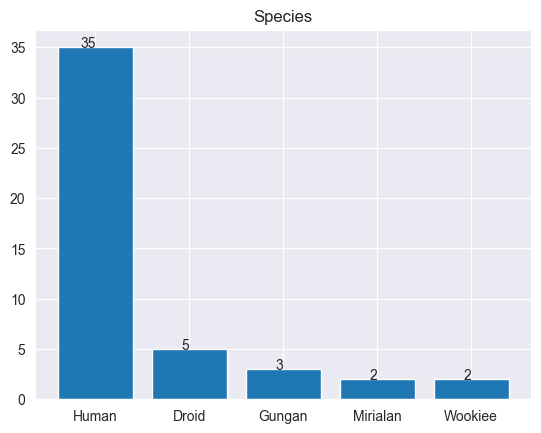

In [107]:
fig, ax = plt.subplots()
ax.bar(data=df, x=x.index, height=x.values)
ax.set_title('Species')

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.4, patch.get_height()), ha='right')

### - with pandas

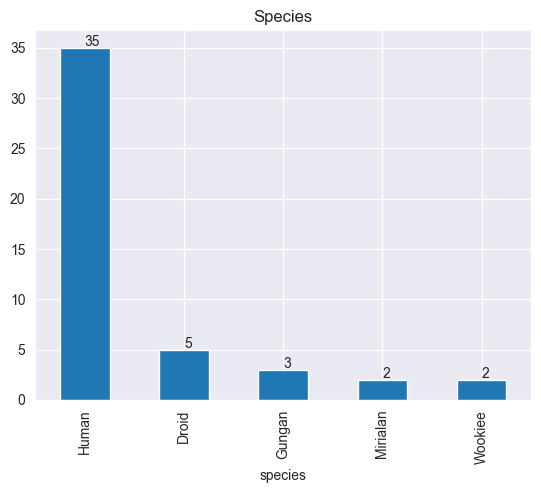

In [111]:
fig, ax = plt.subplots()
ax = df.species.value_counts().head().plot(kind='bar', title='Species', xlabel='species')

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.25, patch.get_height()+0.2))

## Task_5 - Plotting the Characters by aged > 100 years with names

In [112]:
df.head()

# BBY: Before the Battle of Yavin
# let's assume that Battle of Yavin starts today.

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,Normal_mass
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid,Low_mass
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,High_mass
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,Low_mass


In [124]:
df['birth_year_without_BBY'] = df.birth_year.str.replace('BBY', '').astype(float)
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category,birth_year_without_BBY
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human,Normal_mass,19.0
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass,112.0
2,R2-D2,96.0,32.0,no hair,"white, blue",red,33BBY,no gender,Naboo,Droid,Low_mass,33.0
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human,High_mass,41.9
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human,Low_mass,19.0


In [125]:
df[df.birth_year_without_BBY > 100]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,mass_category,birth_year_without_BBY
1,C-3PO,167.0,75.0,no hair,gold,yellow,112BBY,no gender,Tatooine,Droid,Normal_mass,112.0
12,Chewbacca,228.0,112.0,brown,NaN,blue,200BBY,male,Kashyyyk,Wookiee,High_mass,200.0
15,Jabba Desilijic Tiure,175.0,1358.0,no hair,"green-tan, brown",orange,600BBY,hermaphrodite,Nal Hutta,Hutt,High_mass,600.0
18,Yoda,66.0,17.0,white,green,brown,896BBY,male,NaN,Yoda's species,Low_mass,896.0
63,Dooku,193.0,80.0,white,fair,brown,102BBY,male,Serenno,Human,Normal_mass,102.0


### - with matplotlib

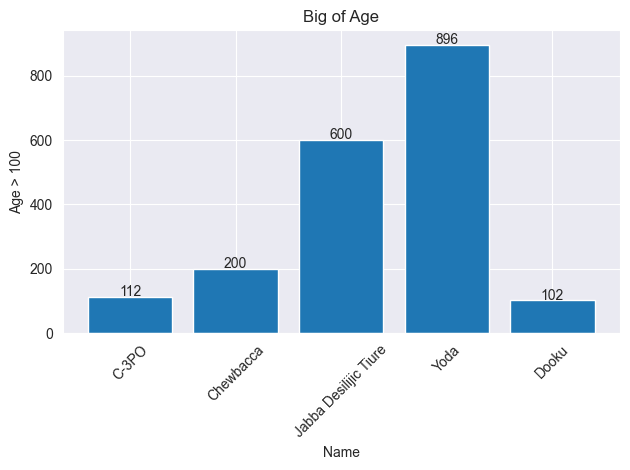

In [141]:
x = df[df.birth_year_without_BBY > 100]

fig, ax = plt.subplots()
ax.bar(data=df, x=x.name, height=x.birth_year_without_BBY)
ax.set_title('Big of Age')
ax.set_xlabel('Name')
ax.set_ylabel('Age > 100')

plt.xticks(rotation=45)
plt.tight_layout()

for patch in ax.patches:
    plt.annotate(text=round(patch.get_height()), xy=(patch.get_x()+0.4, patch.get_height()+2), ha='center')

### - with pandas

Text(4.0, 117.0, '102')

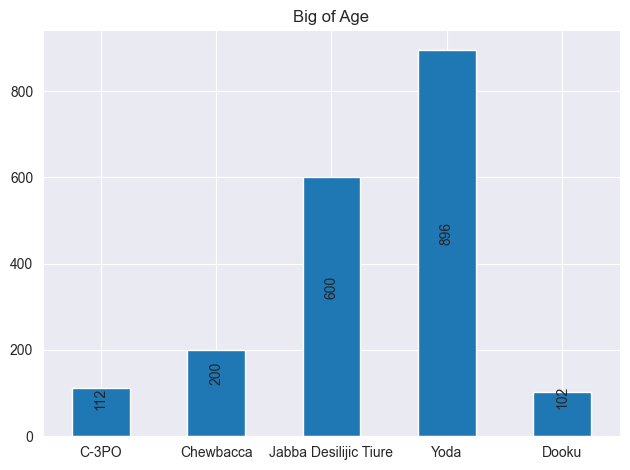

In [205]:
ax = df[df.birth_year_without_BBY > 100].plot(kind='bar', x='name', y='birth_year_without_BBY',
                                         legend=None, title='Big of Age')
plt.xticks(rotation='horizontal')
plt.xlabel(None)
plt.tight_layout()

plt.annotate(text=round(ax.patches[0].get_height()), 
             xy=(ax.patches[0].get_x()+0.25, ax.patches[0].get_height()),
             rotation=90, ha='center', va='top')
plt.annotate(text=round(ax.patches[1].get_height()), 
             xy=(ax.patches[1].get_x()+0.25, ax.patches[1].get_height()-75),
             rotation=90, ha='center')
plt.annotate(text=round(ax.patches[2].get_height()), 
             xy=(ax.patches[2].get_x()+0.25, ax.patches[2].get_height()-275),
             rotation=90, ha='center')
plt.annotate(text=round(ax.patches[3].get_height()), 
             xy=(ax.patches[3].get_x()+0.25, ax.patches[3].get_height()-446),
             rotation=90, ha='center')
plt.annotate(text=round(ax.patches[4].get_height()), 
             xy=(ax.patches[4].get_x()+0.25, ax.patches[4].get_height()+15),
             rotation=90, ha='center', va='top')

## Task_6 - Task 6. Plotting the Characters by hair_color (PIE CHART)

In [215]:
df.hair_color.value_counts()

hair_color
none             29
brown            18
no hair          14
black            13
white             4
blond             3
brown, grey       1
auburn, white     1
auburn, grey      1
grey              1
auburn            1
blonde            1
Name: count, dtype: int64

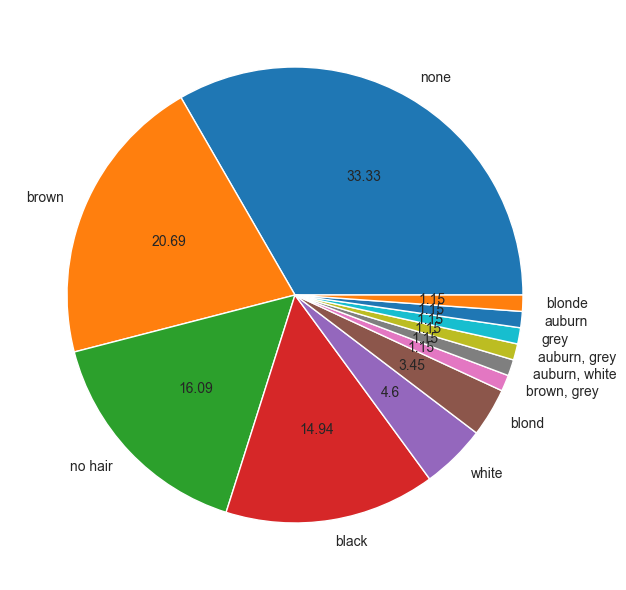

In [221]:
plt.figure(figsize=(10, 6))
plt.pie(x=df.hair_color.value_counts().values,
        labels=df.hair_color.value_counts().index,
        autopct=lambda x: round(x, 2));
plt.tight_layout()